In [ ]:
!nvidia-smi

Mon Oct 14 16:36:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-10-14 16:36:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-10-14 16:36:27 (15.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2024-10-14 16:36:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   128MB/s    in 14s     

2024-10-14 16:36:42 (108 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

In [ ]:
unzip_data("101_food_classes_10_percent.zip")

In [ ]:
train_dir = "101_food_classes_10_percent/train"
test_dir = "101_food_classes_10_percent/test"

In [ ]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/dumplings'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/crab_cakes'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/miso_soup'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/oysters'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/caprese_salad'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/huevos_rancheros'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/baby_back_ribs'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/filet_mignon'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 image

In [ ]:
import tensorflow as tf
img_size = (224,224)

In [ ]:

image_size = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=image_size, label_mode="categorical" )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, image_size=image_size, label_mode="categorical", shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [ ]:
checkpoint_path = "checkpoint/checkpoit.ckpt.weights.h5"
checkpoint_model = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      verbose=1,
                                                      save_weights_only=True,
                                                      save_freq='epoch',
                                                      monitor="val_accuracy",
                                                      save_best_only=True)

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = data_augmentation(inputs, training=False)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(101, activation="softmax", name="ouput_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,
            epochs=5,
            validation_data=test_data,
            validation_steps=int(0.15*len(test_data)),
            callbacks=[create_tensorboard_callback("transfer_learning", "model_1"), checkpoint_model],
            steps_per_epoch=len(train_data))

Saving TensorBoard log files to: transfer_learning/model_1/20241014-174337
Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1197 - loss: 4.0925
Epoch 1: val_accuracy improved from -inf to 0.37262, saving model to checkpoint/checkpoit.ckpt.weights.h5
237/237 ━━━━━━━━━━━━━━━━━━━━ 1017s 4s/step - accuracy: 0.1201 - loss: 4.0905 - val_accuracy: 0.3726 - val_loss: 2.7725
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.37262
237/237 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3464 - val_loss: 2.7872
Epoch 3/5
154/237 ━━━━━━━━━━━━━━━━━━━━ 3:57 3s/step - accuracy: 0.4019 - loss: 2.6600

In [ ]:
evaluate_model_1 = model_1.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 61s 78ms/step - accuracy: 0.4796 - loss: 2.0986


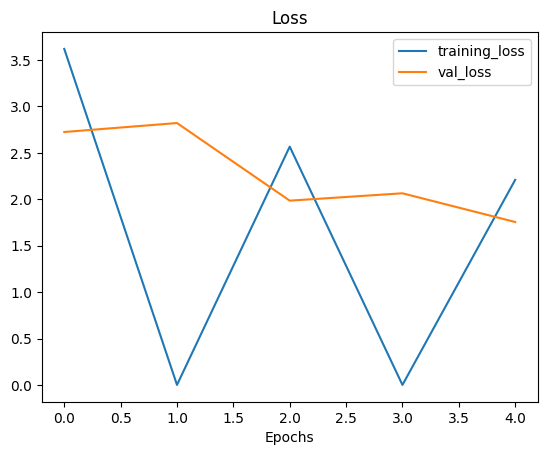

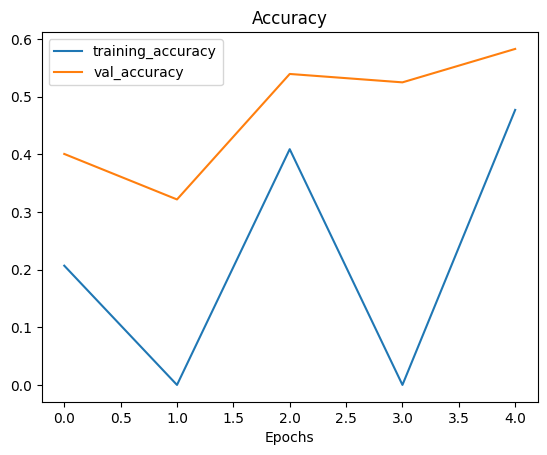

In [ ]:
plot_loss_curves(history_1)

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-5]:
  layer.tranable=False

In [ ]:
model_1.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [ ]:
history_2 = model_1.fit(train_data, epochs=10,
                        validation_data=test_data,
                        validation_steps=int(0.15*len(test_data)),
                        initial_epoch=history_1.epoch[-1], steps_per_epoch=len(train_data))

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 153s 464ms/step - accuracy: 0.0367 - loss: 4.7304 - val_accuracy: 0.0585 - val_loss: 9.7253
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0090 - val_loss: 12.6373
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 108s 456ms/step - accuracy: 0.0458 - loss: 4.3130 - val_accuracy: 0.0297 - val_loss: 7.2007
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0056 - val_loss: 7.0581
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 105s 440ms/step - accuracy: 0.0685 - loss: 4.0929 - val_accuracy: 0.0416 - val_loss: 6.0749
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0522 - val_loss: 5.8920


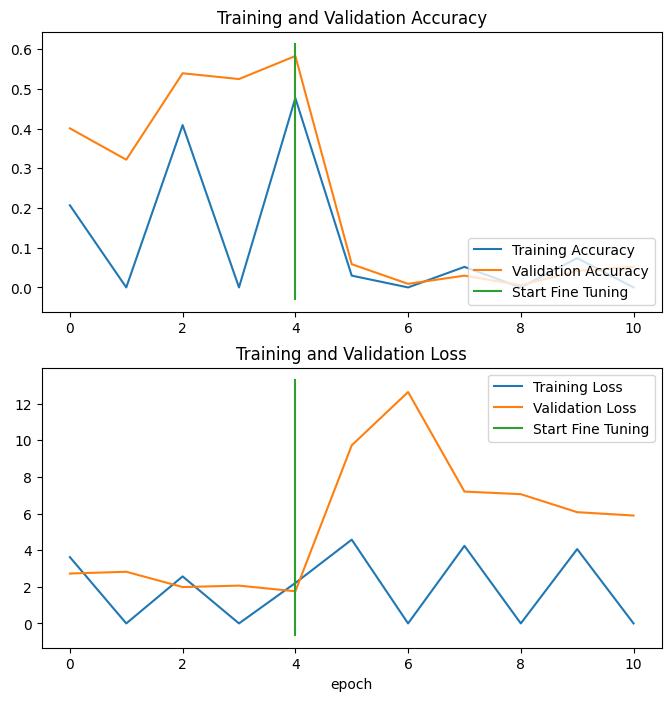

In [ ]:
compare_historys(history_1, history_2)

In [ ]:
model_1.save('06_101_food_class_10_percent_saved_big_dog_model.keras')

In [ ]:
import tensorflow as tf
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2024-10-14 17:30:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’

06_101_food_class_1 100%[===================>]  44.59M   170MB/s    in 0.3s    

2024-10-14 17:31:00 (170 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’ saved [46760742/46760742]



In [ ]:
unzip_data("06_101_food_class_10_percent_saved_big_dog_model.zip")

In [ ]:
model = tf.keras.models.load_model("06_101_food_class_10_percent_saved_big_dog_model.keras")

In [ ]:
result_evaluate_downloaded_model=model.evaluate(test_data)

790/790 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - accuracy: 0.0110 - loss: 6.9762


In [ ]:
evaluate_model_1

[1.9726589918136597, 0.5069702863693237]

In [ ]:
result_evaluate_downloaded_model

In [ ]:
preds_probs = model.predict(test_data, verbose=1)

In [ ]:
preds_probs[:10]

In [ ]:
test_data.class_names[tf.argmax(preds_probs[0])]

In [ ]:
preds_probs[0].argmax()

In [ ]:
test_data.class_names[preds_probs[0].argmax()]

In [ ]:
y_labels = []
for img, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

In [ ]:
y_labels[:10]

In [ ]:
result_evaluate_downloaded_model

In [ ]:
import numpy as np

In [ ]:
from helper_functions import make_confusion_matrix

In [ ]:
class_name = test_data.class_names
class_name

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")


In [ ]:
make_confusion_matrix(y_true=y_labels, y_pred=preds_class,classes=class_name, figsize=(100,100), text_size=20, savefig=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_labels, y_pred=preds_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.00      0.00      0.00       250
           2       0.00      0.00      0.00       250
           3       0.00      0.00      0.00       250
           4       0.00      0.00      0.00       250
           5       0.00      0.00      0.00       250
           6       0.00      0.00      0.00       250
           7       0.00      0.00      0.00       250
           8       0.00      0.00      0.00       250
           9       0.00      0.00      0.00       250
          10       0.00      0.00      0.00       250
          11       0.00      0.00      0.00       250
          12       0.00      0.00      0.00       250
          13       0.00      0.00      0.00       250
          14       0.00      0.00      0.00       250
          15       0.00      0.00      0.00       250
          16       0.00      0.00      0.00       250
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
classification_report_dict = classification_report(y_labels, preds_class, output_dict=True)
classification_report_dict

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '11': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '12': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 250.0},
 '13': {'

In [ ]:
class_f1_score={}
for k, v in classification_report_dict.items():
  if k == 'accuracy':
    break
  key = class_name[int(k)]
  class_f1_score[key] = v["f1-score"]
class_f1_score

{'apple_pie': 0.0,
 'baby_back_ribs': 0.0,
 'baklava': 0.0,
 'beef_carpaccio': 0.0,
 'beef_tartare': 0.0,
 'beet_salad': 0.0,
 'beignets': 0.0,
 'bibimbap': 0.0,
 'bread_pudding': 0.0,
 'breakfast_burrito': 0.0,
 'bruschetta': 0.0,
 'caesar_salad': 0.0,
 'cannoli': 0.0,
 'caprese_salad': 0.0,
 'carrot_cake': 0.0,
 'ceviche': 0.0,
 'cheese_plate': 0.0,
 'cheesecake': 0.0,
 'chicken_curry': 0.0,
 'chicken_quesadilla': 0.0,
 'chicken_wings': 0.0,
 'chocolate_cake': 0.0,
 'chocolate_mousse': 0.0,
 'churros': 0.0,
 'clam_chowder': 0.0,
 'club_sandwich': 0.0,
 'crab_cakes': 0.0,
 'creme_brulee': 0.0,
 'croque_madame': 0.0,
 'cup_cakes': 0.0,
 'deviled_eggs': 0.0,
 'donuts': 0.0,
 'dumplings': 0.0,
 'edamame': 0.01474875664551535,
 'eggs_benedict': 0.0,
 'escargots': 0.0,
 'falafel': 0.0,
 'filet_mignon': 0.0,
 'fish_and_chips': 0.015444015444015444,
 'foie_gras': 0.0,
 'french_fries': 0.0,
 'french_onion_soup': 0.0,
 'french_toast': 0.0,
 'fried_calamari': 0.0,
 'fried_rice': 0.0,
 'frozen_y

In [ ]:
import pandas as pd
f1_score = pd.DataFrame({"class_names":list(class_f1_score.keys()),
                         "f1-score":list(class_f1_score.values())}).sort_values("f1-score", ascending=False)
f1_score

class_names  f1-score
68     onion_rings  0.021741
38  fish_and_chips  0.015444
33         edamame  0.014749
60  lobster_bisque  0.012677
70        pad_thai  0.012531
..             ...       ...
28   croque_madame  0.000000
27    creme_brulee  0.000000
26      crab_cakes  0.000000
25   club_sandwich  0.000000
39       foie_gras  0.000000

[101 rows x 2 columns]

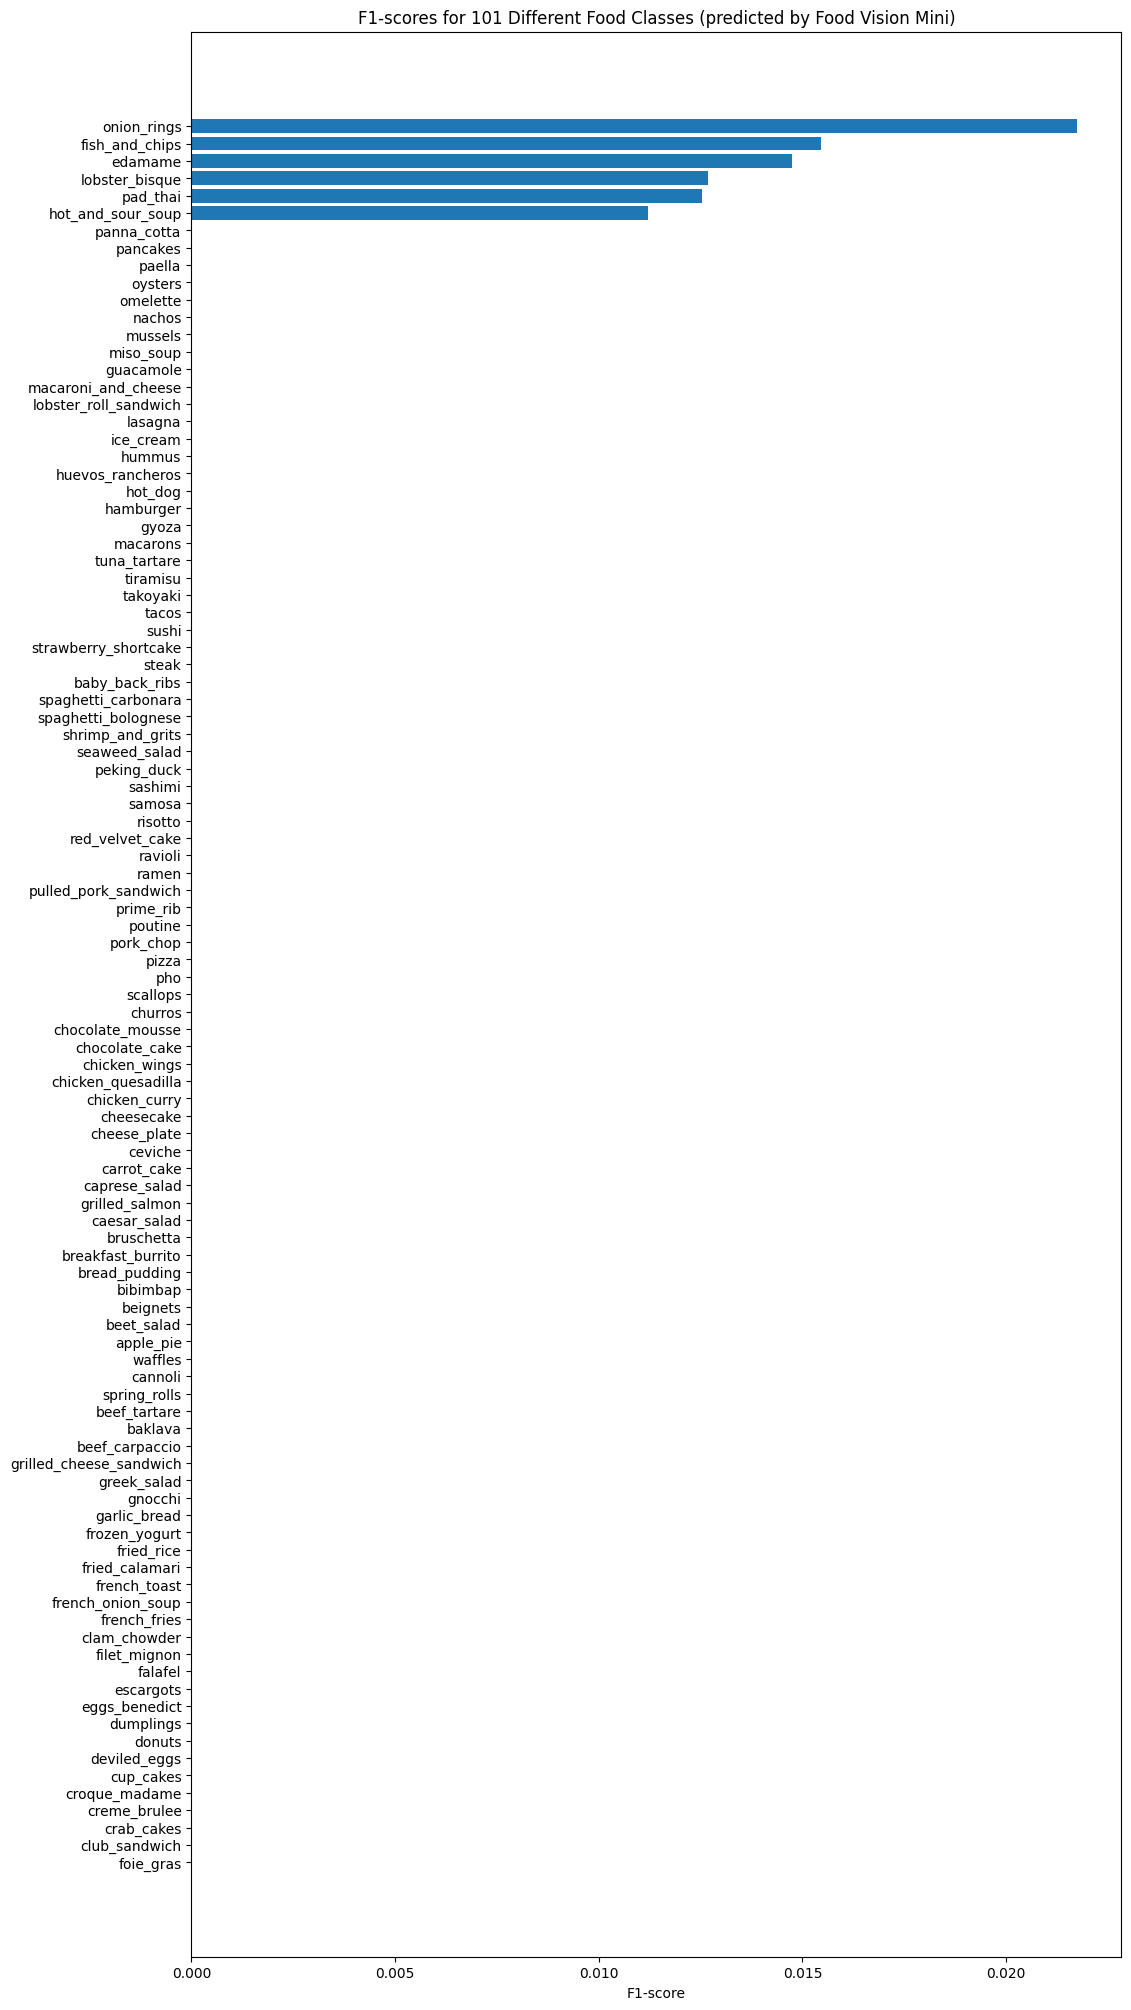

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,25))
scores = ax.barh(range(len(f1_score)), f1_score["f1-score"].values)
ax.set_yticks(range(len(f1_score)))
ax.set_yticklabels(f1_score["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1-scores for 101 Different Food Classes (predicted by Food Vision Mini)")
ax.invert_yaxis();

In [ ]:
def load_and_prep(path, shape=224, scale=True):
  img = tf.io.read_file(path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.resize(img, [shape,shape])
  if scale:
    img = img/255.
  return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


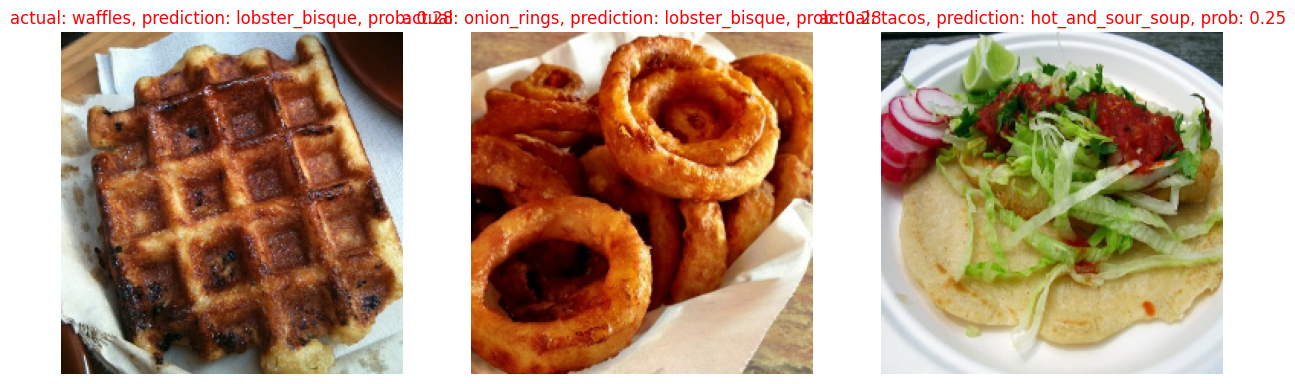

In [ ]:
import os
import random

plt.figure(figsize=(15,10))
for i in range(3):
  class_n = random.choice(class_name)
  file_name = random.choice(os.listdir(test_dir+"/"+class_n))
  file_path = test_dir+"/"+class_n+"/"+file_name

  img = load_and_prep(file_path, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_name[pred_prob.argmax()]

  plt.subplot(1,3, i+1)
  plt.imshow(img/255.)
  if class_n == pred_class:
    title_color = "g"
  else:
    title_color = "r"

  plt.title(f"actual: {class_n}, prediction: {pred_class}, prob: {pred_prob.max():.2f}", color=title_color)
  plt.axis(False)


In [ ]:
filepaths = []
for filepath in test_data.list_files("/content/101_food_classes_10_percent/test/*/*.jpg", shuffle=False):
  filepaths.append(filepath)
filepaths[:10]

[<tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/1011328.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/101251.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/1034399.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/103801.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/1038694.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/1047447.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/1068632.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/110043.jpg'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'/content/101_food_classes_10_percent/test/apple_pie/1106961.jp

In [ ]:
import pandas as pd
preds_classes = preds_probs.argmax(axis=1)
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true":[int(x) for x in y_labels],
                        "y_pred":preds_classes,
                        "pred_conf": preds_probs.max(axis=1),
                        "y_true_classname":[class_name[i] for i in y_labels],
                        "y_pred_classname":[class_name[i] for i in preds_classes]})
pred_df

img_path  y_true  y_pred  \
0      tf.Tensor(b'/content/101_food_classes_10_perce...       0      33   
1      tf.Tensor(b'/content/101_food_classes_10_perce...       0      70   
2      tf.Tensor(b'/content/101_food_classes_10_perce...       0      60   
3      tf.Tensor(b'/content/101_food_classes_10_perce...       0      68   
4      tf.Tensor(b'/content/101_food_classes_10_perce...       0      68   
...                                                  ...     ...     ...   
25245  tf.Tensor(b'/content/101_food_classes_10_perce...     100      68   
25246  tf.Tensor(b'/content/101_food_classes_10_perce...     100      68   
25247  tf.Tensor(b'/content/101_food_classes_10_perce...     100      60   
25248  tf.Tensor(b'/content/101_food_classes_10_perce...     100      60   
25249  tf.Tensor(b'/content/101_food_classes_10_perce...     100      68   

       pred_conf y_true_classname y_pred_classname  
0       0.400925        apple_pie          edamame  
1       0.778610        apple_pie         pad_thai  
2       0.259008        apple_pie   lobster_bisque  
3       0.280840        apple_pie      onion_rings  
4       0.192766        apple_pie      onion_rings  
...          ...              ...              ...  
25245   0.283504          waffles      onion_rings  
25246   0.377955          waffles      onion_rings  
25247   0.496396          waffles   lobster_bisque  
25248   0.332839          waffles   lobster_bisque  
25249   0.222157          waffles      onion_rings  

[25250 rows x 6 columns]

In [ ]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df

img_path  y_true  y_pred  \
0      tf.Tensor(b'/content/101_food_classes_10_perce...       0      33   
1      tf.Tensor(b'/content/101_food_classes_10_perce...       0      70   
2      tf.Tensor(b'/content/101_food_classes_10_perce...       0      60   
3      tf.Tensor(b'/content/101_food_classes_10_perce...       0      68   
4      tf.Tensor(b'/content/101_food_classes_10_perce...       0      68   
...                                                  ...     ...     ...   
25245  tf.Tensor(b'/content/101_food_classes_10_perce...     100      68   
25246  tf.Tensor(b'/content/101_food_classes_10_perce...     100      68   
25247  tf.Tensor(b'/content/101_food_classes_10_perce...     100      60   
25248  tf.Tensor(b'/content/101_food_classes_10_perce...     100      60   
25249  tf.Tensor(b'/content/101_food_classes_10_perce...     100      68   

       pred_conf y_true_classname y_pred_classname  pred_correct  
0       0.400925        apple_pie          edamame         False  
1       0.778610        apple_pie         pad_thai         False  
2       0.259008        apple_pie   lobster_bisque         False  
3       0.280840        apple_pie      onion_rings         False  
4       0.192766        apple_pie      onion_rings         False  
...          ...              ...              ...           ...  
25245   0.283504          waffles      onion_rings         False  
25246   0.377955          waffles      onion_rings         False  
25247   0.496396          waffles   lobster_bisque         False  
25248   0.332839          waffles   lobster_bisque         False  
25249   0.222157          waffles      onion_rings         False  

[25250 rows x 7 columns]

In [ ]:
y_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong

img_path  y_true  y_pred  \
4830   tf.Tensor(b'/content/101_food_classes_10_perce...      19      70   
14328  tf.Tensor(b'/content/101_food_classes_10_perce...      57      70   
17795  tf.Tensor(b'/content/101_food_classes_10_perce...      71      70   
14375  tf.Tensor(b'/content/101_food_classes_10_perce...      57      70   
15636  tf.Tensor(b'/content/101_food_classes_10_perce...      62      70   
...                                                  ...     ...     ...   
11039  tf.Tensor(b'/content/101_food_classes_10_perce...      44      70   
15574  tf.Tensor(b'/content/101_food_classes_10_perce...      62      70   
8138   tf.Tensor(b'/content/101_food_classes_10_perce...      32      70   
1      tf.Tensor(b'/content/101_food_classes_10_perce...       0      70   
8013   tf.Tensor(b'/content/101_food_classes_10_perce...      32      70   

       pred_conf     y_true_classname y_pred_classname  pred_correct  
4830    0.934315   chicken_quesadilla         pad_thai         False  
14328   0.913622               hummus         pad_thai         False  
17795   0.912871               paella         pad_thai         False  
14375   0.911926               hummus         pad_thai         False  
15636   0.910372  macaroni_and_cheese         pad_thai         False  
...          ...                  ...              ...           ...  
11039   0.783672           fried_rice         pad_thai         False  
15574   0.783587  macaroni_and_cheese         pad_thai         False  
8138    0.783363            dumplings         pad_thai         False  
1       0.778610            apple_pie         pad_thai         False  
8013    0.777643            dumplings         pad_thai         False  

[100 rows x 7 columns]

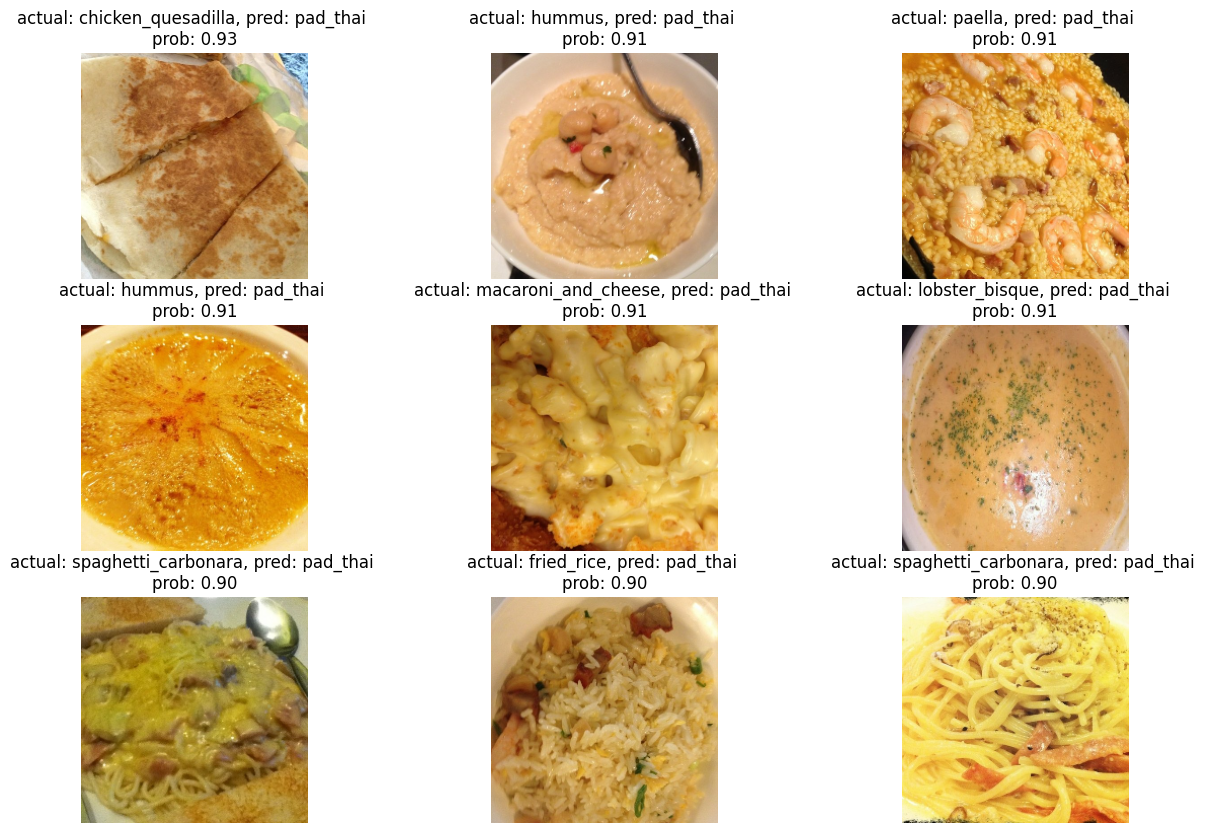

In [ ]:
images_to_view = 9
start_index = 0
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_prep(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
unzip_data("custom_food_images.zip")

--2024-10-14 18:29:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.251.12.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip’

custom_food_images. 100%[===================>]  12.58M  6.90MB/s    in 1.8s    

2024-10-14 18:29:21 (6.90 MB/s) - ‘custom_food_images.zip’ saved [13192985/13192985]



In [ ]:
custom_img = ["custom_food_images/"+img_path for img_path in os.listdir('custom_food_images')]
custom_img

['custom_food_images/pizza-dad.jpeg',
 'custom_food_images/ramen.jpeg',
 'custom_food_images/hamburger.jpeg',
 'custom_food_images/sushi.jpeg',
 'custom_food_images/steak.jpeg',
 'custom_food_images/chicken_wings.jpeg']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


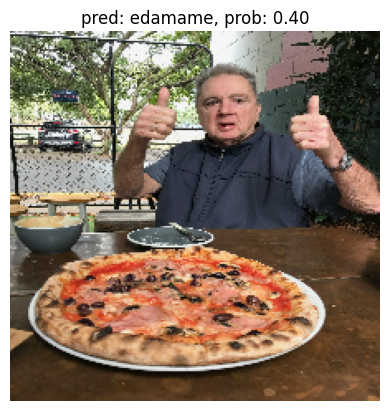

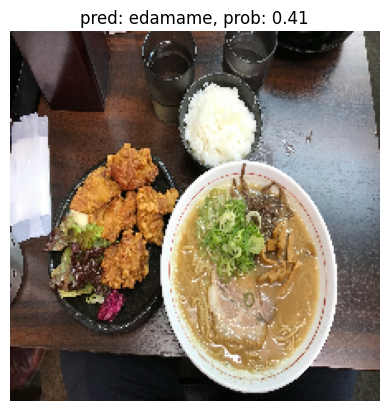

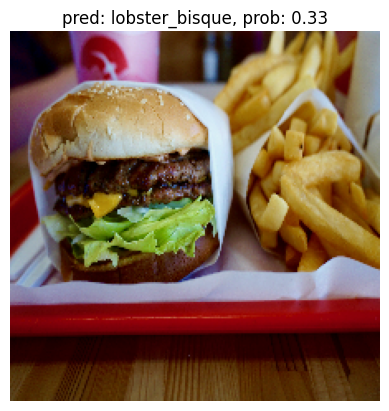

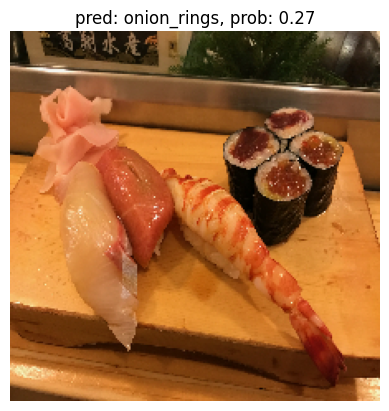

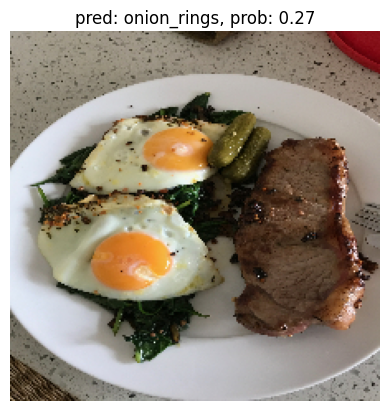

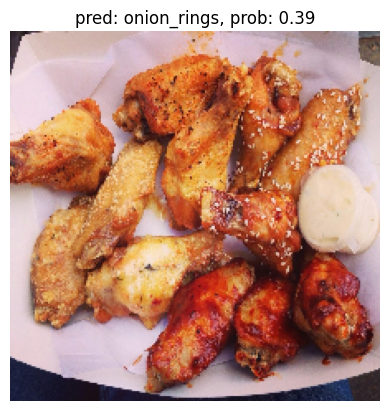

In [ ]:
for img in custom_img:
  img = load_and_prep(img, scale=False)
  pred_prob = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_name[pred_prob.argmax()]

  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)